# TechX2022 - 计算社科 - HW1

## 理想国数据分析
- 下载理想国英文版本txt文件，网址为：http://www.gutenberg.org/cache/epub/150/pg150.txt
- 将下载文件保存到某一个文件夹。
- 使用python读取pg150.txt文件

In [1]:
with open('pg150.txt', 'r') as f:
    lines = f.readlines()
len(lines)

16960

In [9]:
lines[636:660]

['BOOK I\n',
 '\n',
 '\n',
 'SOCRATES - GLAUCON\n',
 '\n',
 'I WENT down yesterday to the Piraeus with Glaucon the son of Ariston,\n',
 'that I might offer up my prayers to the goddess; and also because I\n',
 'wanted to see in what manner they would celebrate the festival, which\n',
 'was a new thing.  I was delighted with the procession of the\n',
 'inhabitants; but that of the Thracians was equally, if not more,\n',
 'beautiful.  When we had finished our prayers and viewed the spectacle,\n',
 'we turned in the direction of the city; and at that instant Polemarchus\n',
 'the son of Cephalus chanced to catch sight of us from a distance as we\n',
 'were starting on our way home, and told his servant to run and bid us\n',
 'wait for him.  The servant took hold of me by the cloak behind, and\n',
 'said: Polemarchus desires you to wait.\n',
 '\n',
 'I turned round, and asked him where his master was.\n',
 '\n',
 'There he is, said the youth, coming after you, if you will only wait.\n',
 '

In [15]:
lines[16600:16610]

['\n',
 "*** END OF THIS PROJECT GUTENBERG EBOOK PLATO'S REPUBLIC ***\n",
 '\n',
 '***** This file should be named 150.txt or 150.zip *****\n',
 'This and all associated files of various formats will be found in:\n',
 '        https://www.gutenberg.org/1/5/150/\n',
 '\n',
 '\n',
 '\n',
 'Updated editions will replace the previous one--the old editions\n']

In [31]:
lines = lines[636:16600]

In [32]:
lines = [i  for i in lines if i !='\n']

In [33]:
lines = ' '.join(lines)

In [34]:
lines = lines.replace('\n', '').replace('.', '').replace(',', '')
lines = lines.replace(';', '').replace('-', ' ').replace("\'", " ")
lines = lines.replace('"', '').replace('(', ' ').replace(')', ' ')

In [35]:
books = lines.split("BOOK")[1:]

In [36]:
len(books)

10

In [37]:
for i in range(len(books)):
    print(i, books[i][:50])

0  I SOCRATES   GLAUCON I WENT down yesterday to the
1  II SOCRATES   GLAUCON WITH these words I was thin
2  III SOCRATES   ADEIMANTUS SUCH then I said are ou
3  IV ADEIMANTUS   SOCRATES HERE Adeimantus interpos
4  V SOCRATES   GLAUCON   ADEIMANTUS SUCH is the goo
5  VI SOCRATES   GLAUCON AND thus Glaucon after the 
6  VII SOCRATES   GLAUCON AND now I said let me show
7  VIII SOCRATES   GLAUCON AND so Glaucon we have ar
8  IX SOCRATES   ADEIMANTUS LAST of all comes the ty
9  X SOCRATES   GLAUCON OF THE many excellences whic


## Relative Frequency

https://chengjun.github.io/mybook/10-text-mining-gov-report.html#id11

In [38]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(ngram_range=(1, 1), lowercase=True)
docs = np.array(books)
bag = count.fit_transform(docs)

In [69]:
CountVectorizer?

In [41]:
import pandas as pd
# Relative Frequency
bt = bag.toarray()
bs = np.sum(bt, axis = 1).reshape(-1,1)
# numpy divide row by row sum
rf = bt/bs
df = pd.DataFrame(rf, columns = count.get_feature_names())
df['chapter'] = range(1, len(books)+1)
df = df.sort_values(by=['chapter'], ascending=False)

In [42]:
df

100        20        27      2700       400        49      4900  \
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000367  0.000092  0.000092  0.000092  0.000184  0.000092  0.000184   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         50       729      8000  ...  youngsters      your     yours  \
9  0.000000  0.000000  0.000000  ...     0.00000  0.001050  0.000000   
8  0.000000  0.000114  0.000000  ...     0.00000  0.000458  0.000000   
7  0.000275  0.000000  0.000092  ...     0.00000  0.000642  0.000092   
6  0.000000  0.000000  0.000000  ...     0.00009  0.001433  0.000090   
5  0.000000  0.000000  0.000000  ...     0.00000  0.000781  0.000173   
4  0.000000  0.000000  0.000000  ...     0.00000  0.001624  0.000074   
3  0.000000  0.000000  0.000000  ...     0.00000  0.000720  0.000000   
2  0.000000  0.000000  0.000000  ...     0.00000  0.000595  0.000000   
1  0.000000  0.000000  0.000000  ...     0.00000  0.001244  0.000000   
0  0.000000  0.000000  0.000000  ...     0.00000  0.003529  0.000168   

   yourself  yourselves     youth  youthful    youths      zeal      zeus  
9  0.000438    0.000000  0.000263  0.000000  0.000000  0.000000  0.000088  
8  0.000229    0.000000  0.000343  0.000000  0.000000  0.000000  0.000114  
7  0.000092    0.000000  0.000642  0.000000  0.000000  0.000000  0.000092  
6  0.000000    0.000090  0.000358  0.000000  0.000000  0.000000  0.000000  
5  0.000000    0.000087  0.000520  0.000000  0.000000  0.000173  0.000000  
4  0.000369    0.000074  0.000591  0.000148  0.000074  0.000000  0.000074  
3  0.000180    0.000000  0.000090  0.000000  0.000090  0.000000  0.000000  
2  0.000000    0.000000  0.001487  0.000000  0.000000  0.000000  0.000372  
1  0.000000    0.000089  0.000267  0.000000  0.000000  0.000000  0.000622  
0  0.000420    0.000000  0.000252  0.000000  0.000000  0.000000  0.000000  

[10 rows x 7293 columns]

In [46]:
df['yourself'][:5]

9    0.000438
8    0.000229
7    0.000092
6    0.000000
5    0.000000
Name: yourself, dtype: float64

In [47]:
df['socrates'][:5]

9    0.000350
8    0.000343
7    0.000275
6    0.000537
5    0.000781
Name: socrates, dtype: float64

In [48]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

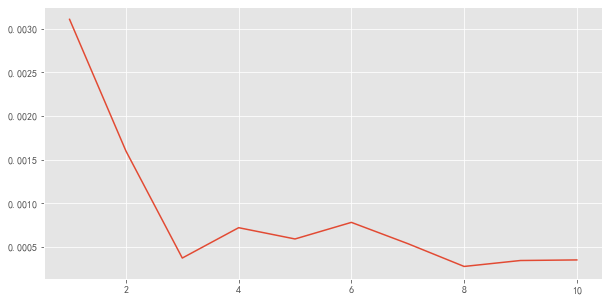

In [50]:
plt.figure(figsize = [10, 5])
plt.plot(df['chapter'], df['socrates']);

In [63]:
def plotEvolution(word, color, linestyle, marker):
    plt.plot(df['chapter'], df[word], color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=18)
    plt.ylabel(u'Relative Frequency', fontsize = 16)
    plt.xlabel(u'The Nth Chapter',  fontsize = 16)

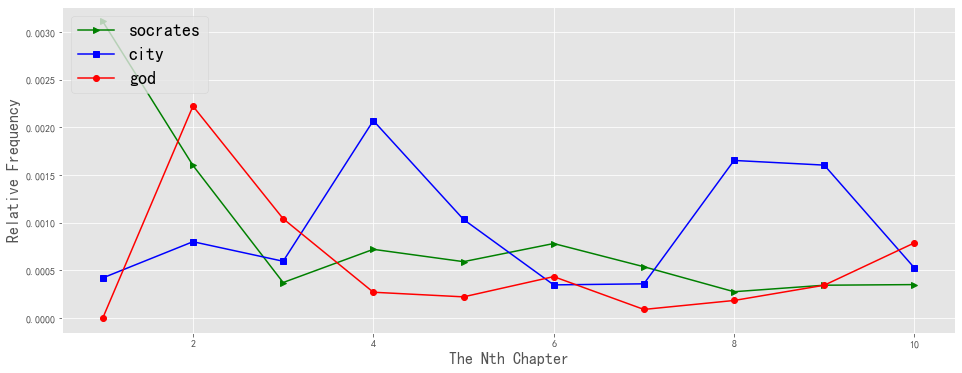

In [64]:
plt.figure(figsize=(16, 6),facecolor='white')
plotEvolution('socrates', 'g', '-', '>')
plotEvolution('city', 'b', '-', 's')
plotEvolution('god', 'r', '-', 'o')

### 任务 1 

使用书中的核心议题词语来绘图

## 使用TF-IDF来计算

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

count = CountVectorizer(ngram_range=(1, 1), lowercase=True)
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
docs = np.array(books)
bag_tfidf = tfidf.fit_transform(count.fit_transform(docs))

In [70]:
TfidfTransformer?

In [66]:
import pandas as pd
# Relative Frequency
bt = bag_tfidf.toarray()
df_tfidf = pd.DataFrame(bt, columns = count.get_feature_names())
df_tfidf ['chapter'] = range(1, len(books)+1)
df_tfidf = df_tfidf.sort_values(by=['chapter'], ascending=False)

In [67]:
def plotEvolution(word, color, linestyle, marker):
    plt.plot(df_tfidf['chapter'], df_tfidf[word], color = color, 
             linestyle=linestyle, marker=marker, label= word)
    plt.legend(loc=2,fontsize=18)
    plt.ylabel(u'TF-IDF', fontsize = 16)
    plt.xlabel(u'The Nth Chapter',  fontsize = 16)

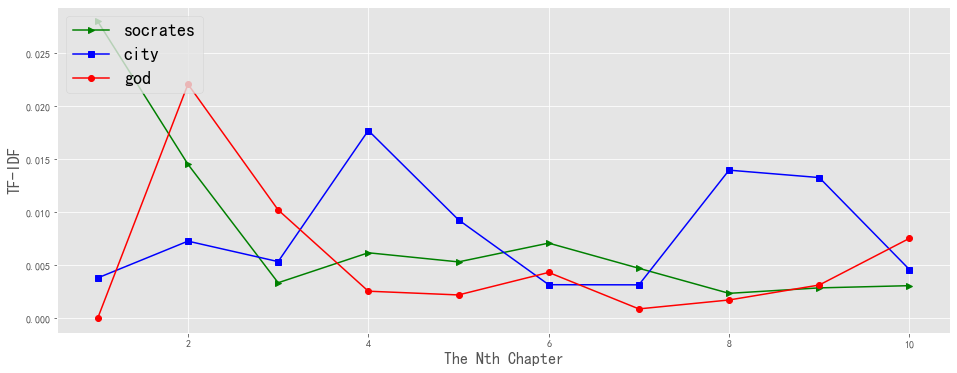

In [68]:
plt.figure(figsize=(16, 6),facecolor='white')
plotEvolution('socrates', 'g', '-', '>')
plotEvolution('city', 'b', '-', 's')
plotEvolution('god', 'r', '-', 'o')

In [72]:
df_tfidf['socrates']

9    0.003047
8    0.002838
7    0.002324
6    0.004688
5    0.007062
4    0.005290
3    0.006151
2    0.003323
1    0.014497
0    0.027971
Name: socrates, dtype: float64

### 任务 2

使用书中的核心议题词语来绘图